# visualization graphs with clustering

## generate excel with first line is source, target, prob.

## generate excel with first line is node id, cluster id

## use gephi

## go through .json file, go through graph file

## extract u,v, p, and generate first excel

## extract clustring, use trans_T2, and generate second excel

In [18]:
# polarized
#------------------


# exported json reading, os ordering, expected mod
import json
import Expected_mod as expmod
from tkinter import Tcl
import os
import load_graph
from Expected_mod import Trans_C2
import load_graph
import pandas as pd
# ordering graph datasets based on k
dataset_path='mcp_acp_data//l50_k2_p0.18_polarized_graph//datasets//'
result_path='mcp_acp_data//l50_k2_p0.18_polarized_graph//result//'
filelists=[i for i in os.listdir(dataset_path) if i!='.DS_Store']
filelists=Tcl().call('lsort','-dict',filelists)
print(filelists)

# read graph
for file in filelists:
    graph=file
# extract u,v,p
    g=load_graph.read_g(dataset_path+graph)
    edge=[]
    p=[]
    for u,v,w in g.edges(data=True):
        edge.append((u,v))
        p.append(w['weight'])
    # strore in excel with first fix line
 
    # Separate source and target from edge tuples
    sources = [u for u, v in edge]
    targets = [v for u, v in edge]

    # Create a DataFrame
    df = pd.DataFrame({
        'source': sources,
        'target': targets,
        'probability': p
    })
    excel_name=file[:-3]+'xlsx'
    # Write to Excel
    df.to_excel(result_path+excel_name, index=False)






('l50_k2_p0.18_polarized_ordered_graph.txt', 'l50_k2_p0.18_polarized_unordered_graph.txt')


In [25]:
# go through file one by one - loop
# extract filename and store it
# go into file, read json file, return a dic
algorithms=[i for i in os.listdir(result_path) if i != '.DS_Store']
print(algorithms)
k=2
l=50
for alg in algorithms:
    alg_name=alg
    alg_result_path=result_path+alg_name+'//'
    #print(alg_result_path)
    file=[i for i in os.listdir(alg_result_path) if i[-5:]=='.json'][0]
    #print(file)
    with open(alg_result_path+file,'r') as fp:
        clusterings=json.load(fp)
    #print(data)
    for c in clusterings:
        graph_feature=c
        clustering=Trans_C2(clusterings[c],k*l)
        node_id=list(range(k*l))
        
        # write it with node id and cluster id
        df = pd.DataFrame({
        'id': node_id,
        'label': clustering,
        
        })
        excel_name=alg_name+'_'+graph_feature+'.xlsx'
        print(excel_name)
        # Write to Excel
        df.to_excel('mcp_acp_data//l50_k2_p0.18_polarized_graph//'+excel_name, index=False)


   

['gmm', 'pkwik', 'mcpc', 'Infomap', 'embedding', 'bayes', 'acpc', 'weigted_louvain']
gmm_ordered.xlsx
gmm_unordered.xlsx
pkwik_ordered.xlsx
pkwik_unordered.xlsx
mcpc_ordered.xlsx
mcpc_unordered.xlsx
Infomap_ordered.xlsx
Infomap_unordered.xlsx
embedding_orderd.xlsx
embedding_unordered.xlsx
bayes_ordered.xlsx
bayes_unordered.xlsx
acpc_ordered.xlsx
acpc_unordered.xlsx
weigted_louvain_ordered.xlsx
weigted_louvain_unordered.xlsx


('l50_k2_p0.18_polarized_ordered_graph.txt', 'l50_k2_p0.18_polarized_unordered_graph.txt')


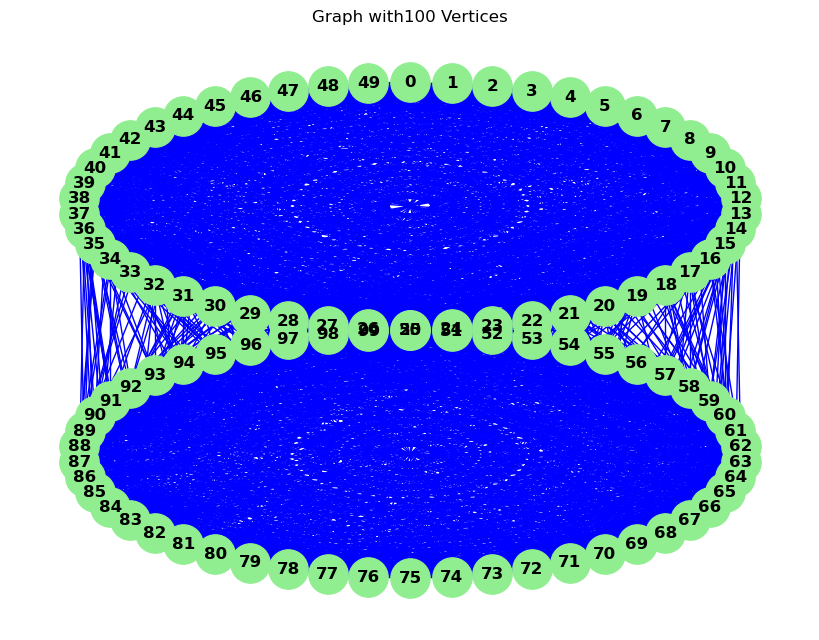

In [26]:
# polarized
#------------------


# exported json reading, os ordering, expected mod
import json
import Expected_mod as expmod
from tkinter import Tcl
import os
import load_graph
from Expected_mod import Trans_C2
import load_graph
import pandas as pd
import networkx as nx 
# ordering graph datasets based on k
dataset_path='mcp_acp_data//l50_k2_p0.18_polarized_graph//datasets//'
result_path='mcp_acp_data//l50_k2_p0.18_polarized_graph//result//'
filelists=[i for i in os.listdir(dataset_path) if i!='.DS_Store']
filelists=Tcl().call('lsort','-dict',filelists)
print(filelists)

# read graph
for file in filelists:
    graph=file
# extract u,v,p
    g=load_graph.read_g(dataset_path+graph)
    edge=[]
    p=[]
    for u,v,w in g.edges(data=True):
        edge.append((u,v))
        p.append(w['weight'])
    # strore in excel with first fix line
 
    load_graph.draw_g(2,50,g)
    break






## expected modularity value

In [ ]:
import json
path='/Users/xinsh758/Documents/academic/evaluation/Evaluation/mcp_acp_data/l50_k2_p0.18_polarized_graph/result/'

# acp
with open(path+'acpc/acpc_polarized.json','r') as fp:
    data1=json.load(fp)
acp_order=data1['ordered']
acp_unorder=data1['unordered']

# bayes
with open(path+'bayes/bayes_polarized.json','r') as fp:
    data2=json.load(fp)
bayes_order=data2['ordered']
bayes_unorder=data2['unordered']

#embeding
with open(path+'embedding/embedding_polarized.json','r') as fp:
    data3=json.load(fp)
print(data3)
urge_order=data3['orderd']
urge_unorder=data3['unordered']

#gmm
with open(path+'gmm/gmm_polarized.json','r') as fp:
    data4=json.load(fp)
gmm_order=data4['ordered']
gmm_unorder=data4['unordered']

# infomap
with open(path+'Infomap/infomap_polarized.json','r') as fp:
    data5=json.load(fp)
infomap_order=data5['ordered']
infomap_unorder=data5['unordered']

# mcpc
with open(path+'mcpc/mcpc_polarized.json','r') as fp:
    data6=json.load(fp)
mcp_order=data6['ordered']
mcp_unorder=data6['unordered']

# pkwik
with open(path+'pkwik/pkwik_polarized.json','r') as fp:
    data7=json.load(fp)
pkwik_order=data7['ordered']
pkwik_unorder=data7['unordered']

# weighted louvain
with open(path+'weigted_louvain/louvain_polarized.json','r') as fp:
    data8=json.load(fp)
louvain_order=data8['ordered']
louvain_unorder=data8['unordered']

{'orderd': [[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49], [50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]], 'unordered': [[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49], [50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]]}


### expected model of order graph

In [14]:
from Expected_mod import APWP
import os
from tkinter import Tcl
import os
import load_graph
from Expected_mod import Trans_C2
import load_graph
import pandas as pd
dataset_path='mcp_acp_data//l50_k2_p0.18_polarized_graph//datasets//'
#result_path='mcp_acp_data//l50_k2_p0.18_polarized_graph//result//'
filelists=[i for i in os.listdir(dataset_path) if i!='.DS_Store']
filelists=Tcl().call('lsort','-dict',filelists)
print(filelists)
#order_graph=filelists[0]
#unorder_graph=filelists[1]
order_graph=load_graph.read_g(dataset_path+filelists[0])
#unorder_graph=load_graph.read_g(dataset_path+filelists[1])
edge=[]
p=[]
for u,v,w in order_graph.edges(data=True):
    edge.append((u,v))
    p.append(w['weight'])
order_mod_louvain=APWP(edge,p,louvain_order)

('l50_k2_p0.18_polarized_ordered_graph.txt', 'l50_k2_p0.18_polarized_unordered_graph.txt')


In [15]:
order_mod_mcp=APWP(edge,p,mcp_order)

In [16]:
order_mod_acp=APWP(edge,p,acp_order)

In [17]:
order_mod_info=APWP(edge,p,infomap_order)

In [18]:
order_mod_gmm=APWP(edge,p,gmm_order)

In [ ]:
order_mod_pkwik=APWP(edge,p,pkwik_order)

In [ ]:
order_mod_urge=APWP(edge,p,urge_order)

In [ ]:
order_mod_baye=APWP(edge,p,bayes_order)

## expected of unordered graph

In [ ]:
from Expected_mod import APWP
import os
from tkinter import Tcl
import os
import load_graph
from Expected_mod import Trans_C2
import load_graph
import pandas as pd
dataset_path='mcp_acp_data//l50_k2_p0.18_polarized_graph//datasets//'
#result_path='mcp_acp_data//l50_k2_p0.18_polarized_graph//result//'
filelists=[i for i in os.listdir(dataset_path) if i!='.DS_Store']
filelists=Tcl().call('lsort','-dict',filelists)
print(filelists)
#order_graph=filelists[0]
#unorder_graph=filelists[1]
unorder_graph=load_graph.read_g(dataset_path+filelists[1])
#unorder_graph=load_graph.read_g(dataset_path+filelists[1])
edge=[]
p=[]
for u,v,w in order_graph.edges(data=True):
    edge.append((u,v))
    p.append(w['weight'])
unorder_mod_louvain=APWP(edge,p,louvain_unorder)
unorder_mod_mcp=APWP(edge,p,mcp_unorder)
unorder_mod_acp=APWP(edge,p,acp_unorder)
unorder_mod_info=APWP(edge,p,infomap_unorder)
unorder_mod_gmm=APWP(edge,p,gmm_unorder)
unorder_mod_pkwik=APWP(edge,p,pkwik_unorder)
unorder_mod_urge=APWP(edge,p,urge_unorder)
unorder_mod_baye=APWP(edge,p,bayes_unorder)
